In [2]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
#importing files in pandas dataframe
train = pd.read_csv('train.csv',header=0)
test = pd.read_csv('test.csv',header = 0)
labels = train['label']
train.drop('label',axis=1, inplace =True)
#test shape =(28000,784), train shape =(42000,784), labels shape = (42000,1)

In [5]:
#Converting dataframes into numpy arrays
train = train.as_matrix()
test = test.as_matrix()
labels = labels.as_matrix()

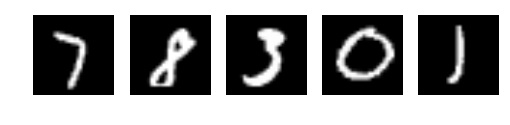

Labels: [7, 8, 3, 0, 1]


In [6]:
#Visualization of few random hand written digits
fig = plt.figure()
randLabels = []
for i in range(1,6):
    k = random.randrange(0,42000,10)
    ax = fig.add_subplot(1,5,i)
    ax.imshow(train[k,:].reshape(28,28),'gray')
    ax.axis('off')
    randLabels.append(labels[k])
plt.show()
print('Labels: {}'.format(randLabels))

In [8]:
#PreProcessing(Data Compression)
pca = PCA()
pca.fit(train)
VarianceRatio = pca.explained_variance_ratio_

In [17]:
#Finding number of principal components
#Retaining 95% of total variance
TotVar = 0
for idx, Var in enumerate(VarianceRatio):
    TotVar += Var
    if(TotVar>=0.95):
        break
print('Total Retained Variance: {}'.format(TotVar))
print('Number of principal components {}'.format(idx))

Total Retained Variance: 0.9504332382633764
Number of principal components 153


In [18]:
#Again fitting pca for 153 principal components
pcaRed = PCA(n_components = 153)
pcaRed.fit(train)
#Compressing training and testing data using fitted data
train = pcaRed.fit_transform(train)
test = pcaRed.fit_transform(test)

In [19]:
#Trying SVM classifier
clf =SVC()
t0 = time.time()
scores = cross_val_score(clf, train, labels, cv=5)
acc = np.mean(scores)
t1 = time.time()
print('Mean 5-fold Cross-Validation Accuracy: {}'.format(acc))
print('Total training and cross-validation accuracy calculation time: {}'.format(np.abs(t1-t0)))

Mean 5-fold Cross-Validation Accuracy: 0.11152381714896926
Total training and cross-validation accuracy calculation time: 8337.242542505264


In [21]:
np.shape(train)

(42000, 153)